<p style="font-family:newtimeroman;font-size:400%;text-align:center;color:white;">Amazon Sales Dataset</p>

<p style="font-family:Arial; font-size:30px; color:white; background-color:black; padding:10px; border-radius:10px;">
                                    Analysis and Visualizing Data
</p>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
%matplotlib inline


In [41]:
df = pd.read_csv(r"C:\Users\Basmala\OneDrive\Desktop\Amason\Data\cleaned_data.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### 1. What are the most common product categories ?

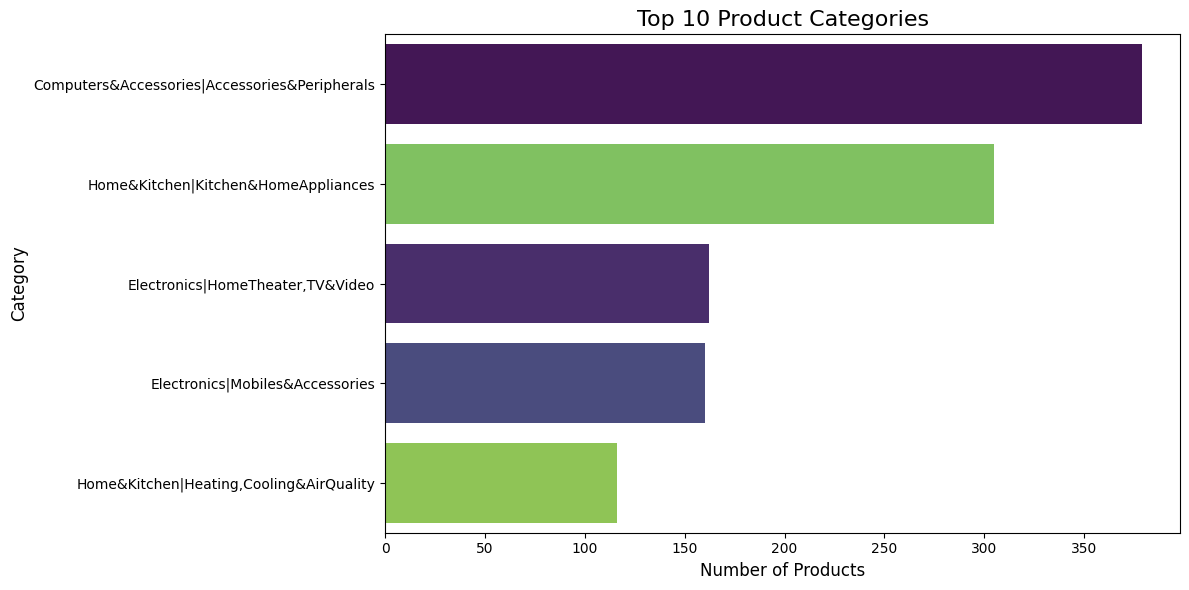

In [42]:
# check Top 10  Categories
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index[:5],
              hue='category', palette="viridis", legend=False)
plt.title("Top 10 Product Categories", fontsize=16)
plt.xlabel("Number of Products", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.tight_layout()
plt.show()

- The visualization displays the top 10 most frequent product categories based on the dataset.This can help identify which categories are the most represented on the platform, and where most reviews are coming from. Understanding category popularity can guide marketing focus or inventory strategy.

### 2. What is the average discount percentage for each category ?

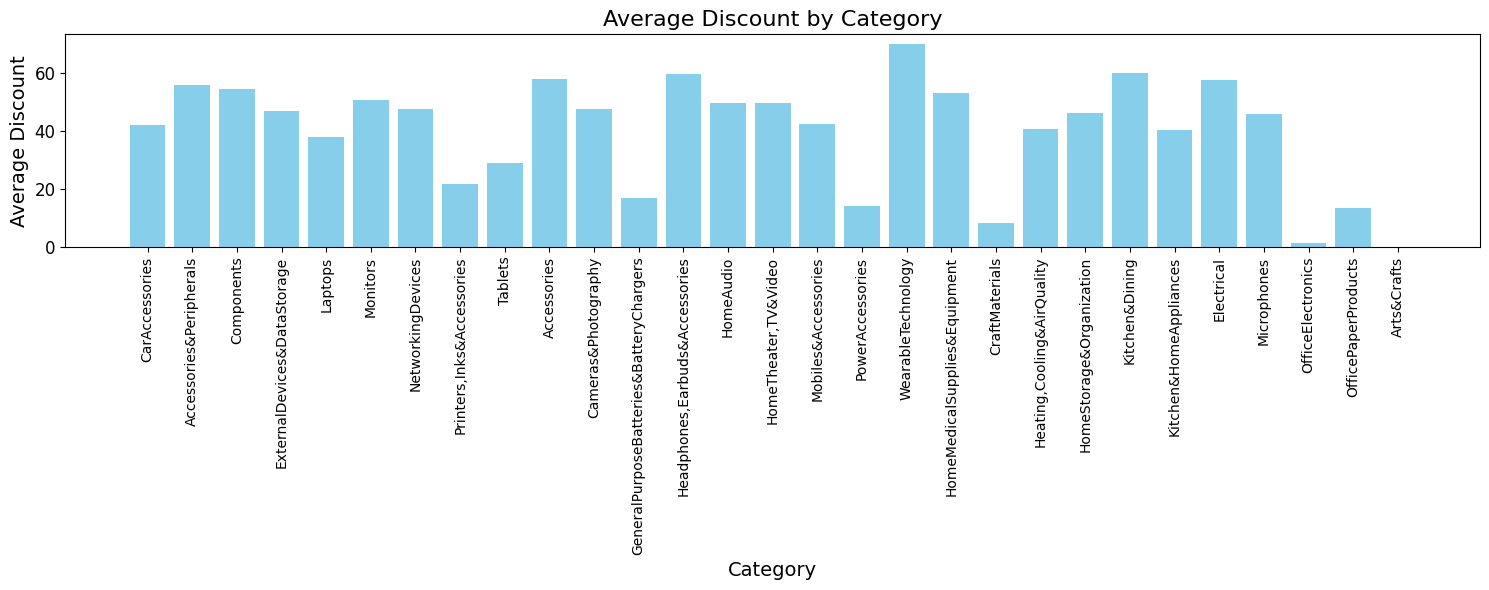

In [43]:
# Group by 'category' and calculate the average 'discount_percentage'
average_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()

#print(average_discount_by_category)

average_discount_by_category['short_category'] = average_discount_by_category['category'].apply(
    lambda x: x.split('|')[-3] if len(x.split('|')) >= 3 else x.split('|')[-1]
)

plt.figure(figsize=(15, 6))
plt.bar(average_discount_by_category['short_category'], average_discount_by_category['discount_percentage'], color='skyblue')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Discount', fontsize=14)
plt.title('Average Discount by Category', fontsize=16)
plt.tight_layout()
plt.show()


### 3.What is the distribution of product ratings ?

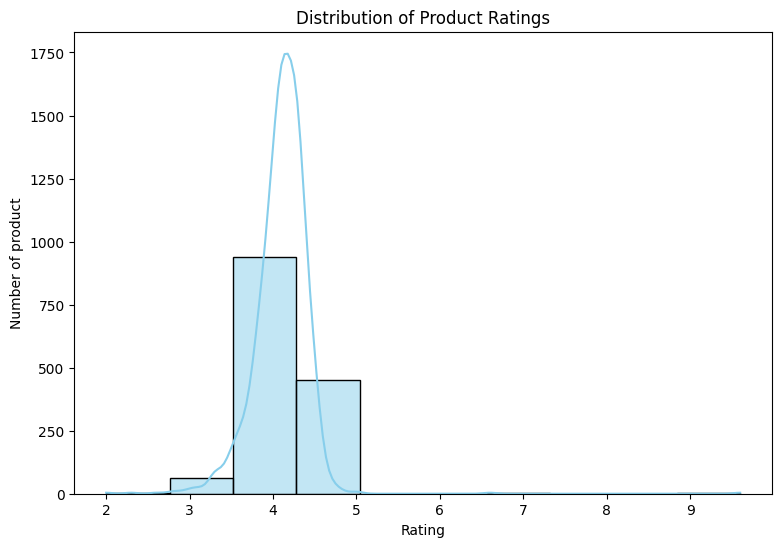

In [44]:
#print(df["rating"].notnull().sum())
#print(df["rating"].unique())
#print(df[df["rating"].notnull()].head(10))

# Histogram for product ratings
plt.figure(figsize=(9, 6))
sns.histplot(df['rating'], bins=10 , kde=True , color='skyblue')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of product")
plt.show()

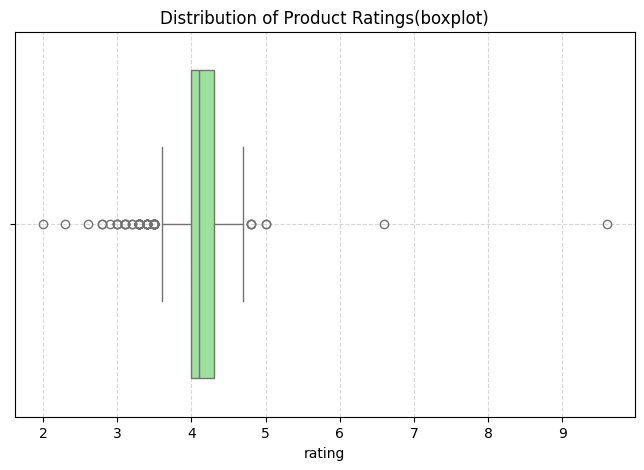

In [45]:
#boxplot for product ratings
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='rating', color= 'lightgreen')
plt.title('Distribution of Product Ratings(boxplot)')
plt.xlabel('rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- we detect that there is some outliers 

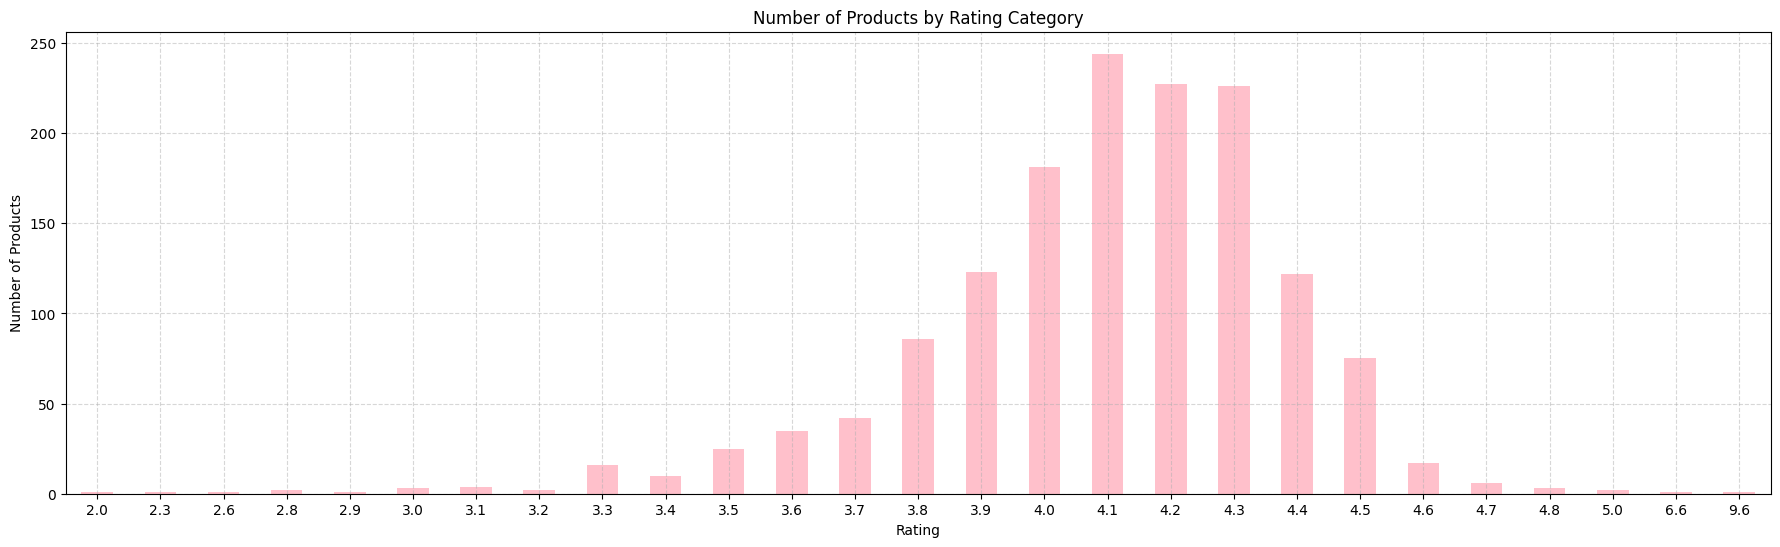

In [46]:
#Count products in each rating category
rating_counts=df['rating'].value_counts().sort_index()
#print(rating_counts)

#bar plot for rating categories
plt.figure(figsize=(22, 6))
rating_counts.plot(kind='bar', color='pink')
plt.title('Number of Products by Rating Category')
plt.xlabel('Rating')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- The distribution of ratings can reveal trends such as whether most products are highly rated or if there's a significant number of poor reviews.

### 4.  Is there a correlation between discount percentage and product rating?


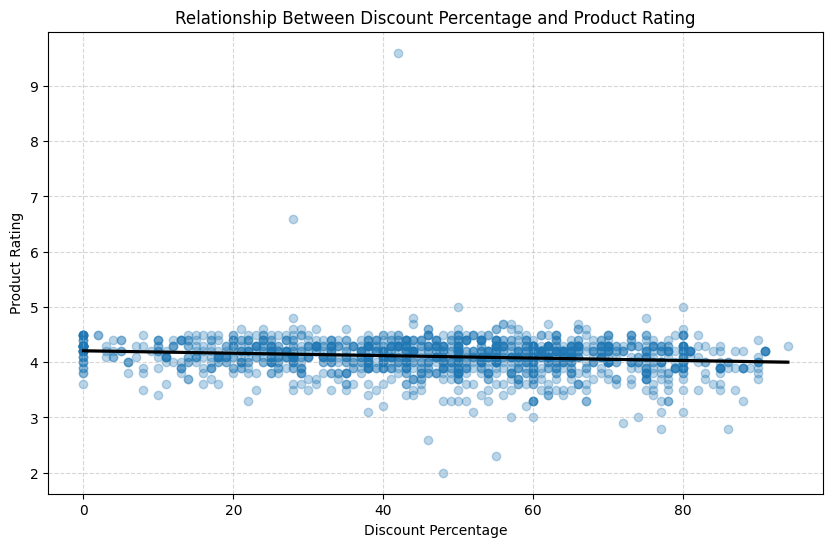

In [47]:
#Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='discount_percentage', y='rating', data=df,
            scatter_kws={'alpha':0.3}, line_kws={'color':'black'})
plt.title('Relationship Between Discount Percentage and Product Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Product Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
#Calculate Correlation Coefficients
pearson1=df['discount_percentage'].corr(df['rating'],method='pearson')
spearman1=df['discount_percentage'].corr(df['rating'],method='spearman')

print(f"Pearson Correlation Coefficient: {pearson1:.3f}")
print(f"Spearman Rank Correlation: {spearman1:.3f}")

#Pearson: Measures the linear relationship (from -1 to 1)
#0.8 to 1.0: Very strong positive correlation
#0.6 to 0.8: Strong correlation
#0.4 to 0.6: Moderate correlation
#0.2 to 0.4: Weak correlation
#-0.2 to 0.2: No clear correlation
#Spearman: Measures the monotonic relationship

**Is there a correlation between discount percentage and acual price**

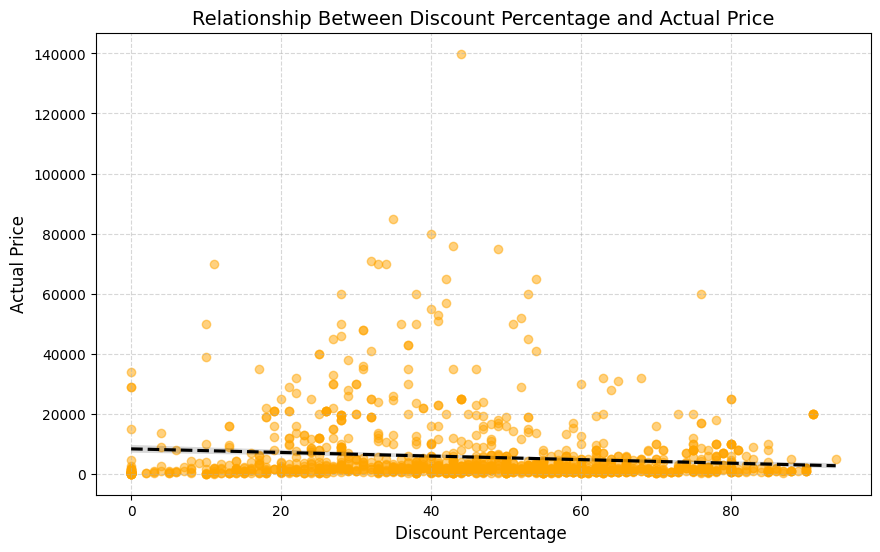

In [50]:
# Scatter plot between actual and discounted price
plt.figure(figsize=(10, 6))
sns.regplot(
    x='discount_percentage',
    y='actual_price',
    data=df,
    scatter_kws={'alpha': 0.5, 'color': 'orange'},
    line_kws={'color': 'black', 'linestyle': '--'}
)
plt.title('Relationship Between Discount Percentage and Actual Price', fontsize=14)
plt.xlabel('Discount Percentage ', fontsize=12)
plt.ylabel('Actual Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

- This scatter plot helps identify if there is any correlation between product discount percentage and Actual price. A strong correlation might indicate that heavily discounted products are often rated differently.

In [132]:
 #Calculate Pearson & spearman correlation
pearson_corr=df['actual_price'].corr(df['discount_percentage'],method='pearson')
spearman_corr=df['actual_price'].corr(df['discount_percentage'],method='spearman')

print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}")
print(f"Spearman Rank Correlation: {spearman_corr:.4f}")


Pearson Correlation Coefficient: -0.03
Spearman Rank Correlation: -0.0688


### 5.  How does rating count influence the rating ?

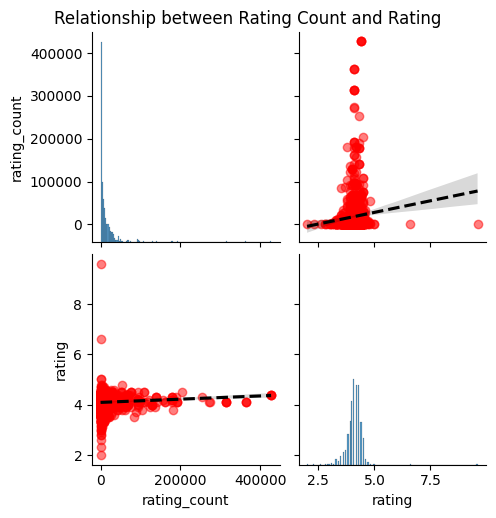

In [51]:
# Select only the two columns you need
pair_df = df[['rating_count', 'rating']]

# Plot
sns.pairplot(pair_df, kind='reg', plot_kws={'line_kws': {'color': 'black', 'linestyle': '--'}, 'scatter_kws': {'color': 'red', 'alpha': 0.5}})
plt.suptitle('Relationship between Rating Count and Rating', y=1.02)
plt.show()

### 6.  Are longer reviews more positive or negative ?

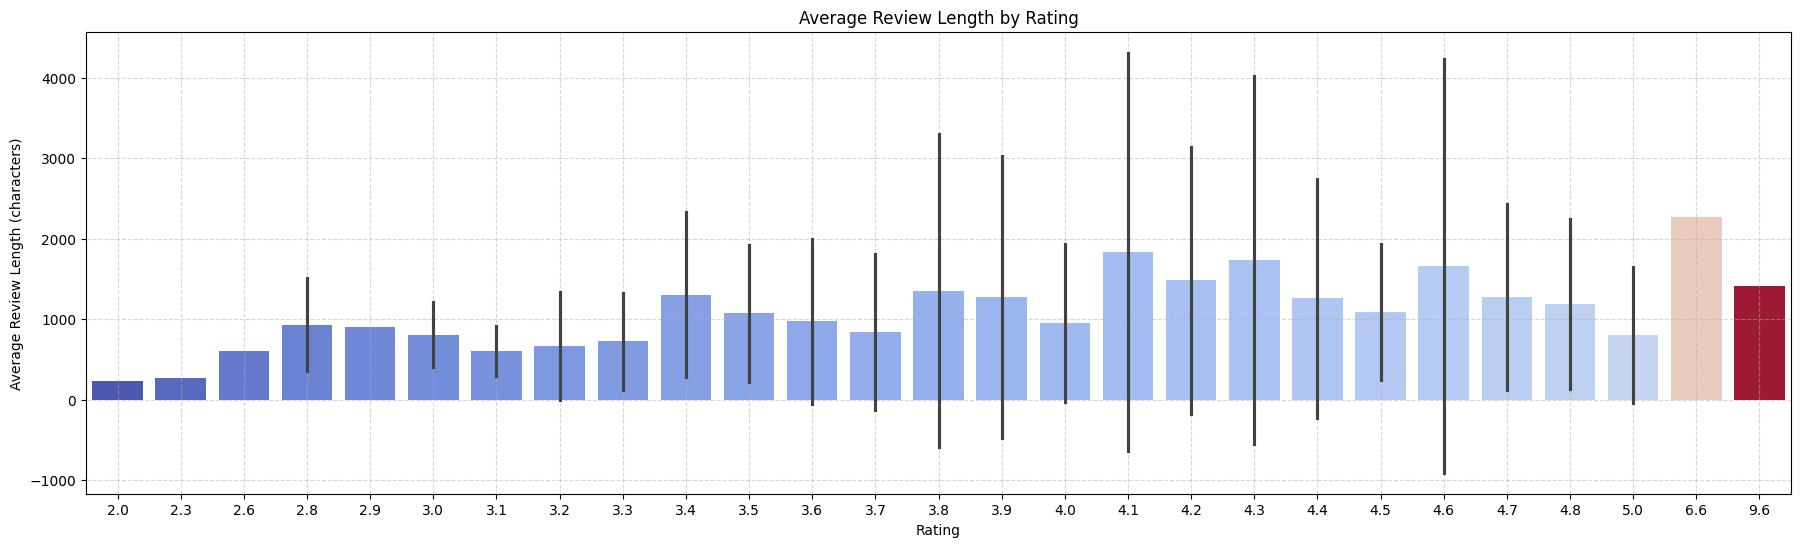

In [52]:

# Make sure review_length is calculated
df['review_length'] = df['review_content'].astype(str).apply(len)

# Create a barplot (updated to avoid warnings)
plt.figure(figsize=(22, 6))
sns.barplot(
    x='rating', 
    y='review_length', 
    data=df, 
    errorbar='sd',          # <--- FIXED instead of 'ci'
    hue='rating',            # <--- Set hue to x-variable
    palette='coolwarm', 
    legend=False             # <--- Remove duplicate legend
)

plt.title('Average Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Review Length (characters)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


- This chart shows the relationship between the length of product reviews and the product ratings. It can help us understand if longer reviews are associated with more positive or negative feedback

### 7. Who are the top reviewers based on the number of reviews written?

C:\Users\Basmala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2358 (\N{DEVANAGARI LETTER SHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Basmala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Basmala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Basmala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-pa

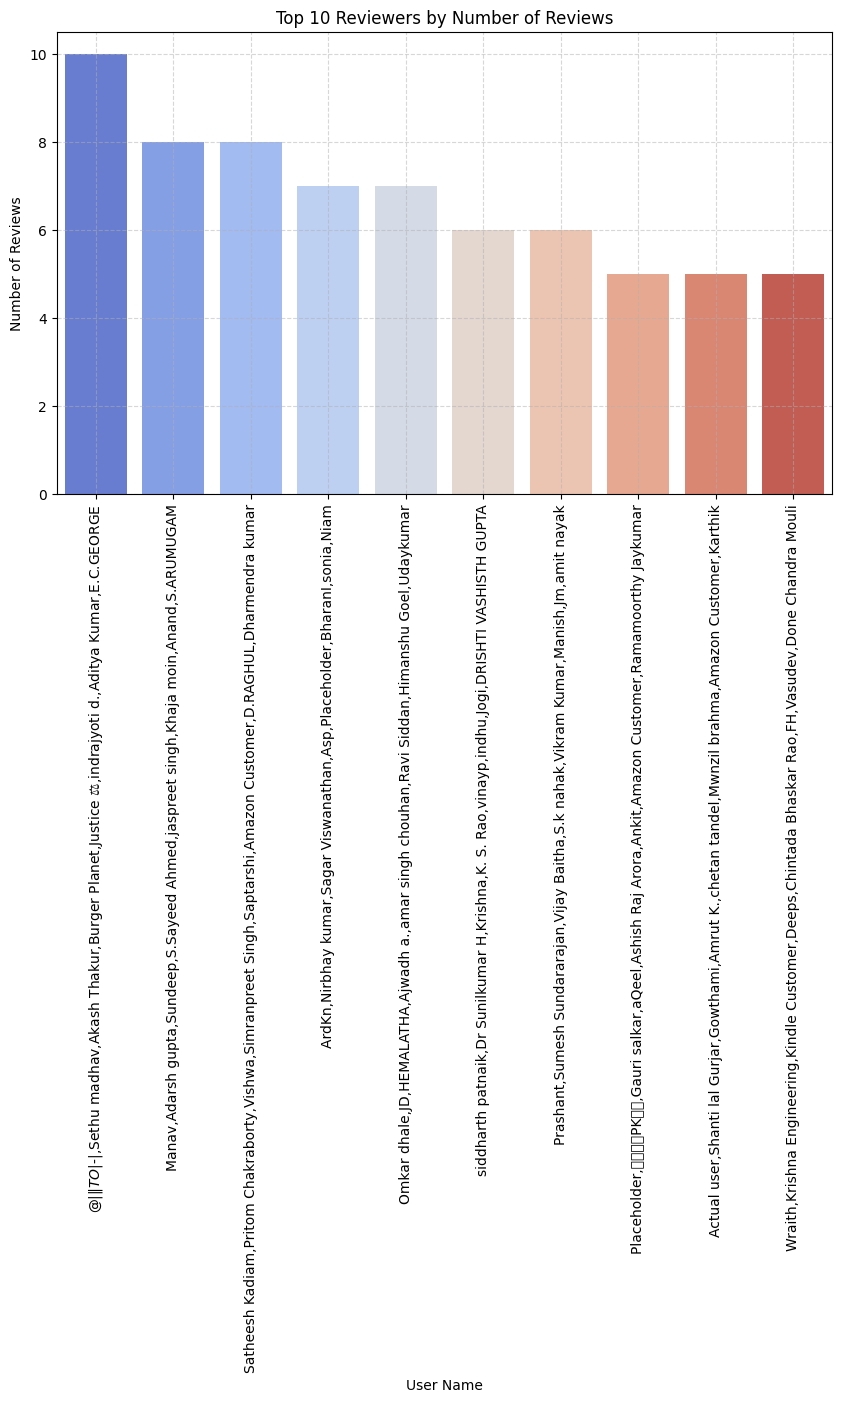

In [53]:


# Count the number of reviews for each user
top_reviewers = df['user_name'].value_counts().head(10).reset_index()

# Rename columns for clarity
top_reviewers.columns = ['user_name', 'review_count']

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_reviewers, 
    x='user_name', 
    y='review_count', 
    hue='user_name',      # Hue is set to user_name to color the bars differently
    palette='coolwarm'    # You can change the palette to something else (e.g., 'viridis', 'mako')
)

# Adding labels and title
plt.title('Top 10 Reviewers by Number of Reviews')
plt.xlabel('User Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)  # Rotate the x-axis labels for readability
plt.grid(True, linestyle='--', alpha=0.5)  # Optional: adds a grid to the plot
plt.show()


- The chart displays the top 10 users who have written the most reviews. Identifying these users can help in understanding the influence of frequent reviewers on product ratings

### 8.Which category has the highest number of reviews?

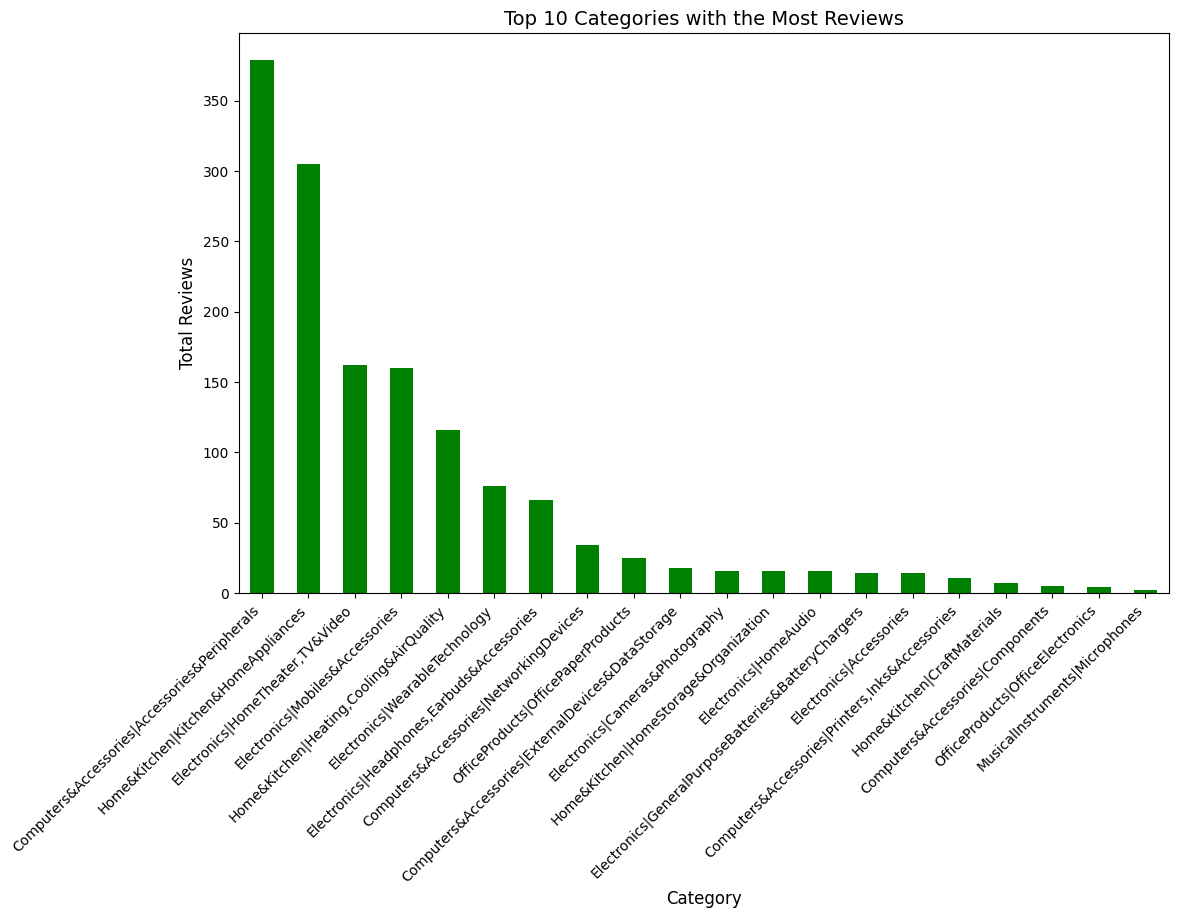

In [54]:
# Top 10 categories with the most reviews
top_categories = df['category'].value_counts().head(20)

# Create the bar plot for the top 10 categories
plt.figure(figsize=(12,8))
top_categories.plot(kind='bar', color='green')

# Add the title and labels
plt.title('Top 10 Categories with the Most Reviews', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Reviews', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust margins to prevent label overlap
plt.subplots_adjust(bottom=0.2, top=0.9)


plt.show()


- This bar plot shows which product categories have the most reviews. It helps to identify which categories generate more user engagement and feedback .

### 9. What is the relationship between product price and rating?

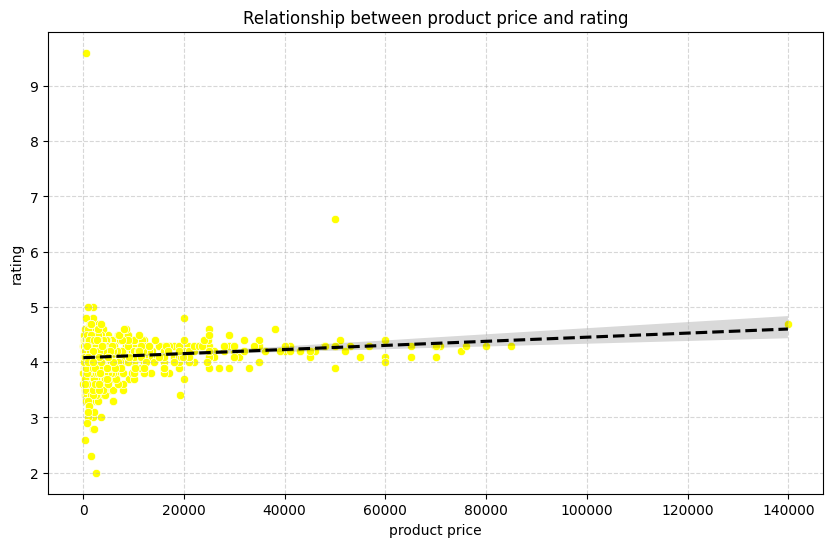

In [55]:
#scatter plot between product price and ranting
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='actual_price', y='rating', color='yellow')
sns.regplot(data=df, x='actual_price', y='rating', scatter=False, color='black', line_kws={'linestyle':'--'})
plt.title('Relationship between product price and rating')
plt.xlabel('product price')
plt.ylabel('rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### 10.  Which category has the highest number of unique users who wrote reviews ?

Category with the highest number of unique users who wrote reviews:
category
Home&Kitchen|Kitchen&HomeAppliances    305
Name: user_id, dtype: int64


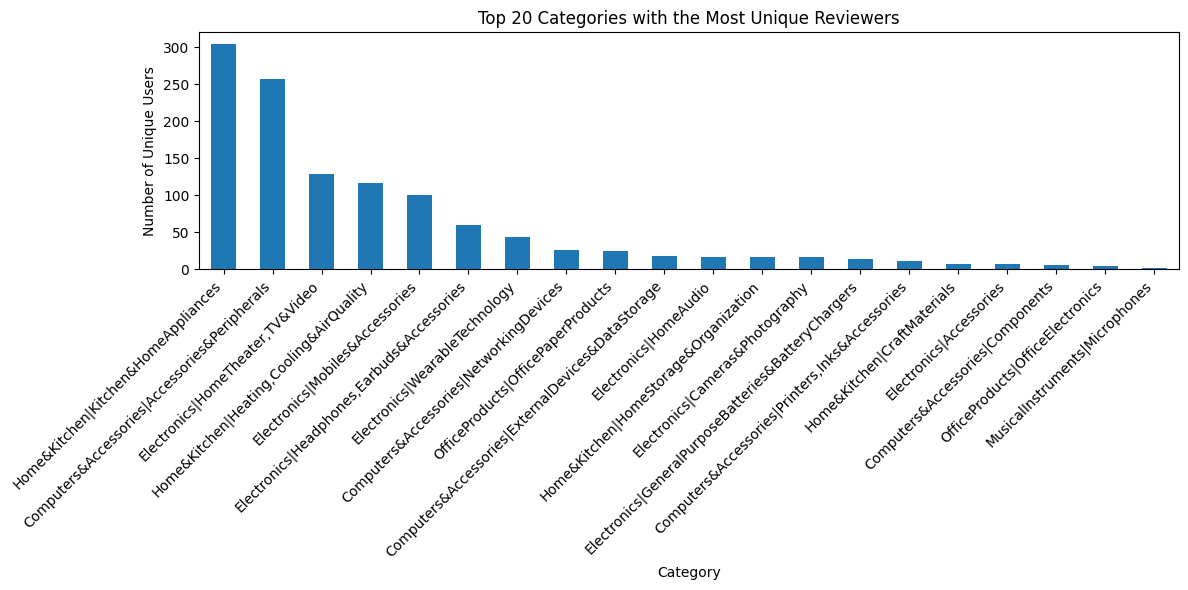

In [56]:
# Group by 'category' and count the number of unique 'user_id' in each category
unique_users_per_category = df.groupby('category')['user_id'].nunique().sort_values(ascending=False)
print("Category with the highest number of unique users who wrote reviews:")
print(unique_users_per_category.head(1))


# Plot the top 20 categories with most unique users
top_20_unique_users = unique_users_per_category.head(20)

plt.figure(figsize=(12,6))
top_20_unique_users.plot(kind='bar')
plt.title('Top 20 Categories with the Most Unique Reviewers')
plt.xlabel('Category')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 11. How do the average ratings compare between discounted and non-discounted products?

In [57]:
#new column to check if the product is discounted
df['is_discounted'] = df['discounted_price'] < df['actual_price']

# Group by discounted status and calculate average rating
avg_ratings_by_discount = df.groupby('is_discounted')['rating'].mean()
print("Average ratings for discounted and non discounted products:")
print(avg_ratings_by_discount)



Average ratings for discounted and non discounted products:
is_discounted
False    4.241667
True     4.097019
Name: rating, dtype: float64


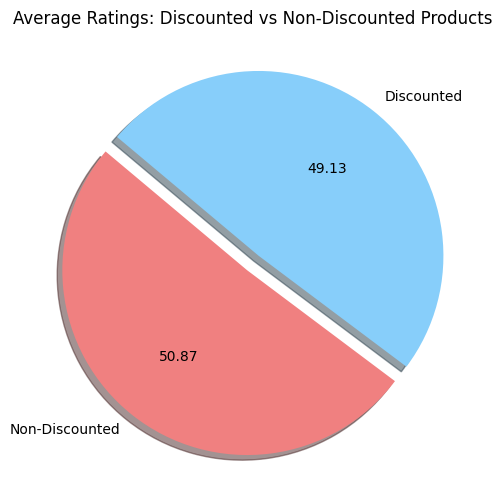

In [58]:
labels = ['Non-Discounted', 'Discounted']
sizes = avg_ratings_by_discount.values
colors = ['lightcoral', 'lightskyblue']
explode = (0.05, 0.05)


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.2f', shadow=True, startangle=140)

plt.title('Average Ratings: Discounted vs Non-Discounted Products')
plt.show()

### 12. What is the most frequent word in product reviews ?

Most frequent word in product reviews:
   word  count
8  good   4398


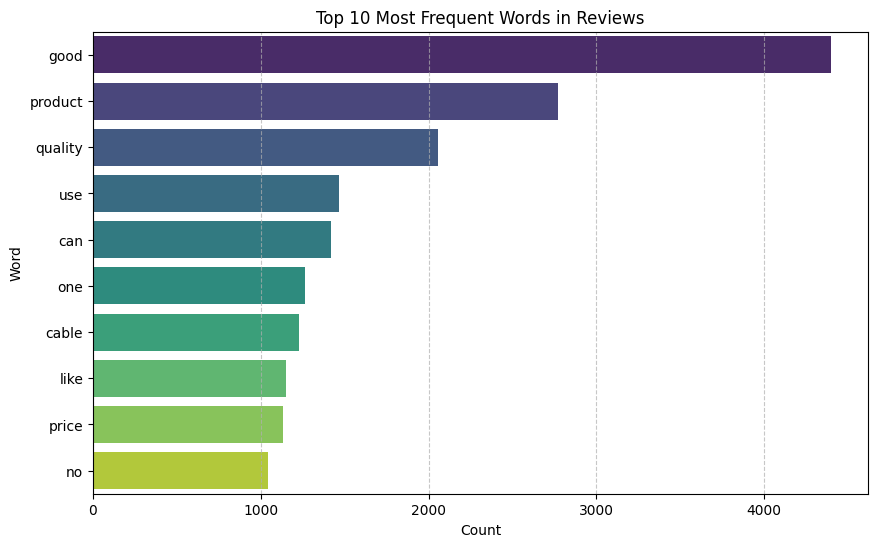

In [59]:

all_reviews = ' '.join(df['review_content'].astype(str).values)
all_reviews = all_reviews.lower()
all_reviews = all_reviews.translate(str.maketrans('', '', string.punctuation))
words = all_reviews.split()


stopwords = ['the', 'and', 'is', 'in', 'it', 'to', 'of', 'for', 'this', 'was',
             'i', 'on', 'a', 'with', 'that', 'very', 'are', 'but', 'as', 'my', 'so',
             'had', 'not', 'have', 'be', 'at', 'you', 'they', 'too', 'if', 'an', 'its','or','from','also','will']


filtered_words = [word for word in words if word not in stopwords]

word_freq = {}
for word in filtered_words:
    word_freq[word] = word_freq.get(word, 0) + 1

word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['word', 'count'])


word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

print("Most frequent word in product reviews:")
print(word_freq_df.head(1))

top_words = word_freq_df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_words,
    x='count',
    y='word',
    hue='word',
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title('Top 10 Most Frequent Words in Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


- The word "good" appeared frequently across reviews, indicating that many users are expressing positive feedback about the product. This suggests that the product is generally well-received, and reviewers are satisfied with its quality or performance.

### 13. Do some product categories tend to receive higher average ratings than others?

In [60]:
# Group by category and calculate average rating
avg_ratings_per_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)

# Show top 10 categories by average rating
print("Top 10 categories by average rating:")
print(avg_ratings_per_category.head(10))

Top 10 categories by average rating:
category
Computers&Accessories|Tablets                          4.600000
Electronics|PowerAccessories                           4.500000
OfficeProducts|OfficeElectronics                       4.450000
Computers&Accessories|Components                       4.380000
Electronics|GeneralPurposeBatteries&BatteryChargers    4.350000
Home&Kitchen|CraftMaterials                            4.342857
Electronics|Accessories                                4.335714
Computers&Accessories|ExternalDevices&DataStorage      4.316667
Toys&Games|Arts&Crafts                                 4.300000
OfficeProducts|OfficePaperProducts                     4.284000
Name: rating, dtype: float64


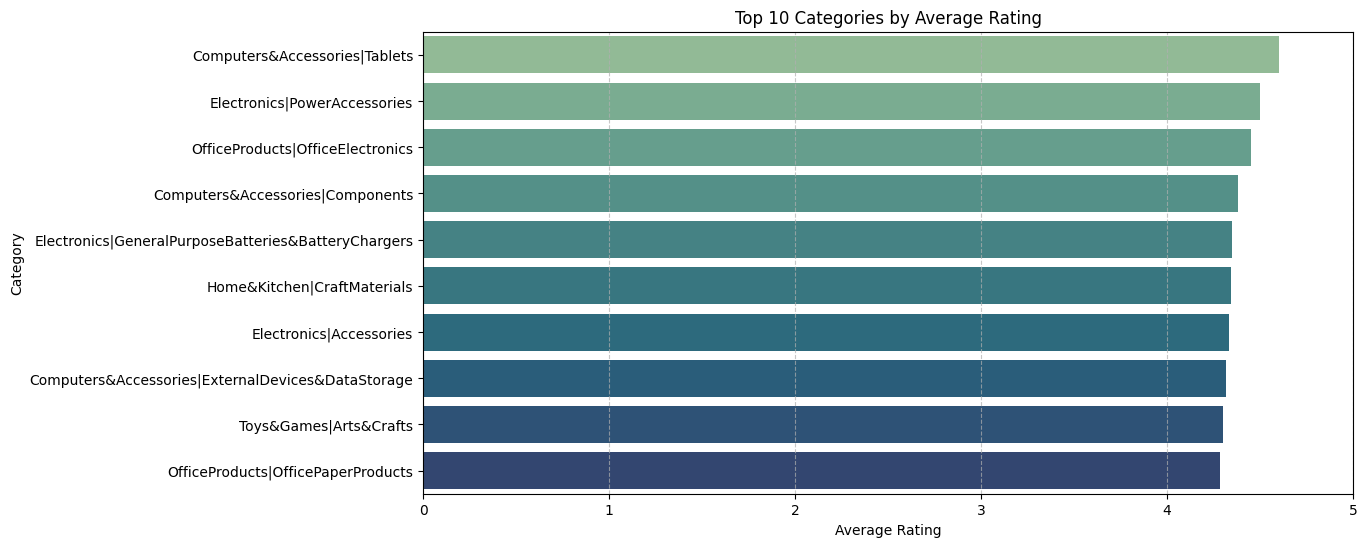

In [61]:
top_10_categories = avg_ratings_per_category.head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_categories,
    x='rating',
    y='category',
    hue='category',
    palette='crest',
    legend=False
)

plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()





### 14. Which products have the highest discount but the lowest rating ?

In [62]:
# Sort by 'discount_percentage' in descending order and 'rating' in ascending order
sorted_df = df.sort_values(by=['discount_percentage', 'rating'], ascending=[False, True])

# Select the top 10 products
top_discount_low_rating = sorted_df.head(10)

print(top_discount_low_rating[['product_name', 'discount_percentage', 'rating']])

                                           product_name  discount_percentage  \
692   rts [2 Pack] Mini USB C Type C Adapter Plug, T...                 94.0   
332   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                 91.0   
362   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                 91.0   
366   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                 91.0   
370   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                 91.0   
378   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                 91.0   
1021  beatXP Kitchen Scale Multipurpose Portable Ele...                 90.0   
915   Silicone Rubber Earbuds Tips, Eartips, Earpads...                 90.0   
2     Sounce Fast Phone Charging Cable & Data Sync U...                 90.0   
405   Sounce Spiral Charger Cable Protector Data Cab...                 90.0   

      rating  
692      4.3  
332      4.2  
362      4.2  
366      4.2  
370      4.2  
378      4.2  
1021     3.7  

C:\Users\Basmala\AppData\Local\Temp\ipykernel_7908\3812645843.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


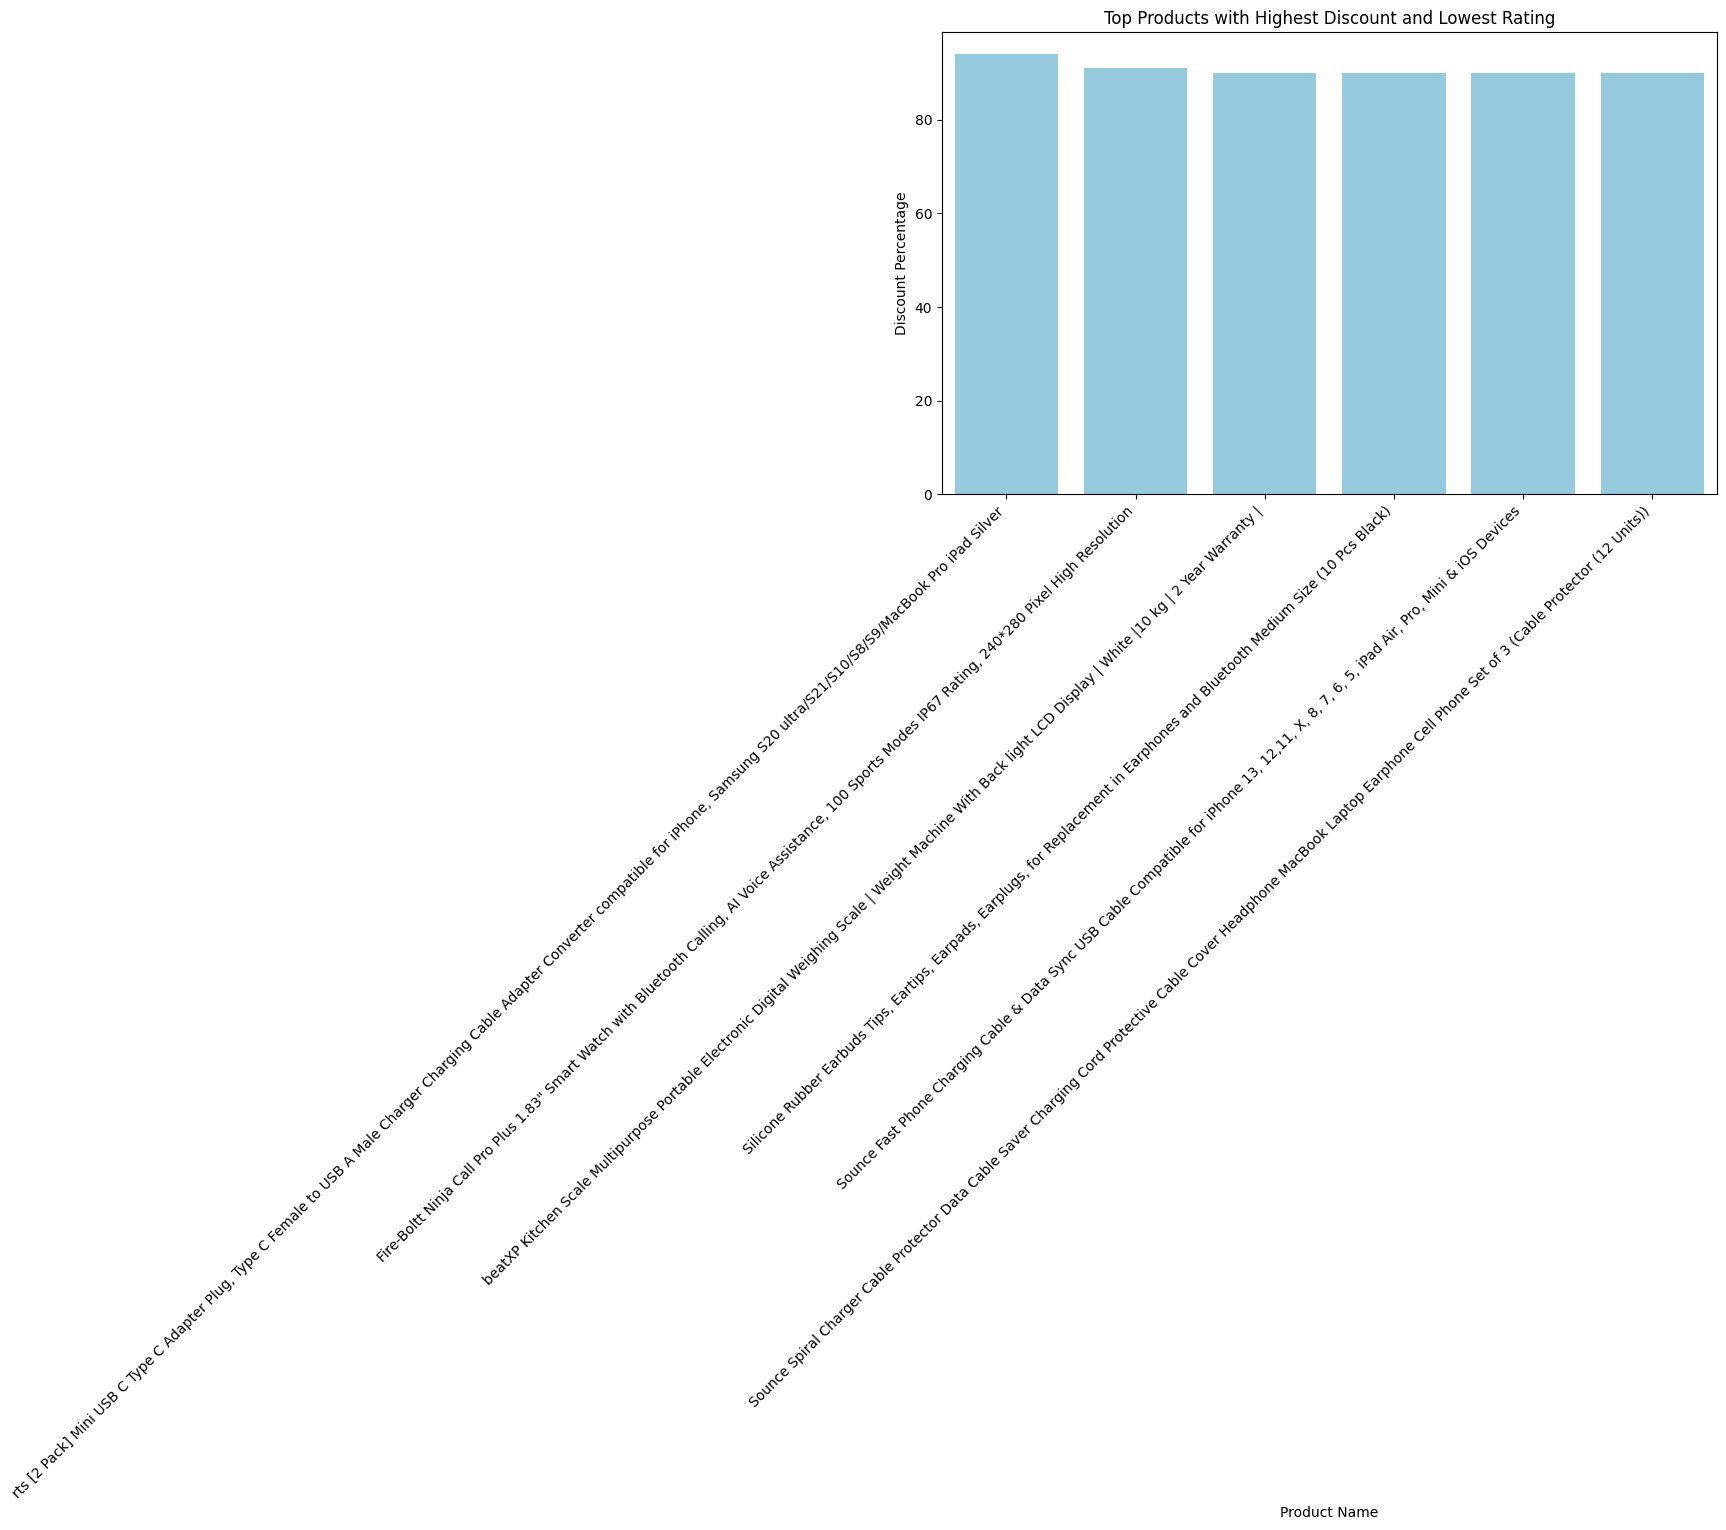

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='discount_percentage', data=top_discount_low_rating, color='skyblue')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.title('Top Products with Highest Discount and Lowest Rating')
plt.xlabel('Product Name')
plt.ylabel('Discount Percentage')

plt.tight_layout()
plt.show()